In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
dftrain=pd.read_csv("C:\\Users\\Hp\\Downloads\\Big-Mart-Sales-Prediction-master\\Train.csv")

In [4]:
col=dftrain.columns
dftrain[col[1]].fillna(value=dftrain[col[1]].mean(),inplace=True) # for Item_Weight


In [5]:
dftrain['Item_type_combined']=dftrain['Item_Identifier'].apply(lambda x:x[0:2])
dftrain['Item_type_combined']=dftrain['Item_type_combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
dftrain['Item_Fat_Content']=dftrain['Item_Fat_Content'].map({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Regular':'Regular','Low Fat':'Low Fat'})
dftrain['Item_Fat_Content'].value_counts().sum()

8523

In [6]:
dftrain.drop(['Item_Type','Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Size'],axis=1,inplace=True)
le = LabelEncoder()
dftrain['Item_Fat_Content'] = le.fit_transform(dftrain['Item_Fat_Content'])
dftrain['Item_type_combined'] = le.fit_transform(dftrain['Item_type_combined'])
dftrain['Item_Identifier'] = le.fit_transform(dftrain['Item_Identifier'])
corr=dftrain.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,0.012853,0.002869,0.787480
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.024756,0.011550,0.063232
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,0.006063,0.018719,-0.166111
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.001315,-0.128625,-0.037571
Item_MRP,0.012853,0.024756,0.006063,-0.001315,1.000000,0.567574,0.032517
Item_Outlet_Sales,0.002869,0.011550,0.018719,-0.128625,0.567574,1.000000,0.011236
Item_type_combined,0.787480,0.063232,-0.166111,-0.037571,0.032517,0.011236,1.000000


In [7]:
dftrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
0,156,9.30,0,0.016047,249.8092,3735.1380,1
1,8,5.92,1,0.019278,48.2692,443.4228,0
2,662,17.50,0,0.016760,141.6180,2097.2700,1
3,1121,19.20,1,0.000000,182.0950,732.3800,1
4,1297,8.93,0,0.000000,53.8614,994.7052,2


In [28]:
 from sklearn.decomposition import PCA
pca = PCA(n_components=6) 

[[ 8.13625223e-04  2.86551093e-05  5.23239722e-06 -3.88678832e-06
   2.07267537e-02  9.99784846e-01  3.49445146e-06]
 [-9.99997913e-01 -4.18551147e-04  1.22027347e-04  2.87945542e-06
  -1.55886286e-03  8.46130305e-04 -9.15186843e-04]
 [-1.57700871e-03  1.78368248e-03 -3.70153729e-05  8.80888725e-05
   9.99782342e-01 -2.07254697e-02  2.12611540e-04]
 [-4.19135401e-04  9.99990652e-01 -1.86175702e-03 -1.39022442e-04
  -1.78532378e-03  8.68918640e-06  3.44206613e-03]
 [ 2.56059348e-04  2.35518511e-03  9.88801437e-01  5.40162257e-03
   6.39173928e-05 -6.23367825e-06 -1.49120504e-01]
 [ 8.85130612e-04  3.12704823e-03 -1.49145677e-01  3.10174277e-03
   2.00284450e-04 -7.13394101e-07 -9.88805008e-01]]
[2.91339319e+06 2.01799651e+05 2.62724821e+03 1.78143494e+01
 2.28023368e-01 1.00355612e-01]


Text(0,0.5,'cumulative explained variance')

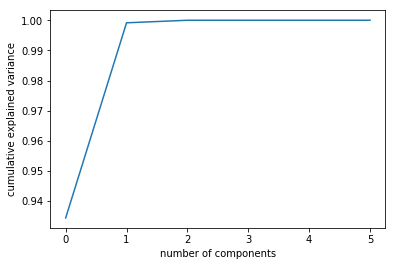

In [29]:
pca.fit(dftrain)
print(pca.components_)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [11]:
from sklearn.model_selection import train_test_split
X = dftrain.drop(['Item_Outlet_Sales'], axis = 'columns')
y = dftrain.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
X_train.to_csv("xtrain.csv")
y_train.to_csv("ytrain.csv")
X_test.to_csv("xtest.csv")
y_test.to_csv("ytest.csv")

In [13]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_type_combined
5601,232,20.250000,1,0.018789,222.0772,1
7829,434,12.857645,0,0.017345,230.8010,1
6078,329,12.800000,0,0.022991,114.9492,1
2754,1007,19.500000,1,0.030689,85.7540,1
2929,480,15.100000,0,0.052329,243.1512,1


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr.score(X_test,y_test)

0.33984416304993725

In [26]:
y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

1349.1915297835235

In [15]:
x=np.array([918,12.60,0,0.02,34.9,1])
x = x.reshape(1,-1)
lr.predict(x)

array([705.58049173])

In [16]:
from sklearn.tree import DecisionTreeRegressor
rt=DecisionTreeRegressor(min_samples_split=20,random_state=201)
rt_model=rt.fit(X_train,y_train)

t_pred=rt_model.predict(X_test)
rt_model.score(X_test,y_test)

0.1091841195754325

In [32]:
rms =sqrt(mean_squared_error(y_test, t_pred))
rms

1619.7770482851538

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rf=RandomForestRegressor(n_estimators=500,max_features=6,min_samples_leaf=5,random_state=201)
rf_model=rf.fit(X=X_train,y=y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test,y_test)

0.3247942157234427

In [21]:
rms = sqrt(mean_squared_error(y_test, rf_pred))
rms

1410.1955589641432

In [20]:
from sklearn.externals import joblib
joblib.dump(lr, 'model.pkl')

['model.pkl']